# "Under the RADAR: An Analysis of AI Text Detection Robustness"
## Demo notebook

### Detector
The following code shows how to load the RADAR detector model and use it for inference. The output of the `predict()` function is the probability of human-written text.

In [1]:
from models.detector import Detector

model_name = "TrustSafeAI/RADAR-Vicuna-7B"
radar = Detector(model_name)

text = "Example text you want to classify."
radar.predict(text)

/home/scur1745/.conda/envs/dl4nlp_gpu/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


0.0009422778966836631

In order to load RADAR model from checkpoint, you can do so in the following way:

In [2]:
# You can also load C-RADAR from ./model_checkpoints/RADARcontr
checkpoint_path = "./model_checkpoints/RADAR2/best_detector_model.pt"
radar_cp = Detector(checkpoint_path=checkpoint_path)

text = "Example text you want to classify."
radar_cp.predict(text)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/gpfs/home4/scur1745/AdversarialGenAIDetector/RADAR/models/detector.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via thi

Loading checkpoint from ./model_checkpoints/RADAR2/best_detector_model.pt


0.46265730261802673

### Paraphraser
The following code shows how to load the RADAR paraphraser model and use it for paraphrasing a given text.

In [3]:
from models.paraphraser import Paraphraser

checkpoint_path = "./model_checkpoints/RADAR2/best_paraphraser_model.pt"
paraphraser = Paraphraser(checkpoint_path=checkpoint_path)

text = "Port-au-Prince, Haiti (CNN) -- Earthquake victims, writhing in pain and grasping at life, watched doctors and nurses walk away from a field hospital Friday night after a Belgian medical team evacuated the area, saying it was concerned about security."
new_text, _, _ = paraphraser.paraphrase(text)

print(f"Original text:\n{text}")
print()
print(f"Paraphrased text:\n{new_text}")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Loading checkpoint from ./model_checkpoints/RADAR2/best_paraphraser_model.pt


/gpfs/home4/scur1745/AdversarialGenAIDetector/RADAR/models/paraphraser.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(checkpoint_

Original text:
Port-au-Prince, Haiti (CNN) -- Earthquake victims, writhing in pain and grasping at life, watched doctors and nurses walk away from a field hospital Friday night after a Belgian medical team evacuated the area, saying it was concerned about security.

Paraphrased text:
-au-Prince --  (CNN) -- Port-au-Prince earthquake victims, writhing in pain and grasping for life. Haiti (CNN) -- Haitian quake survivors, writhing and grasping for life watched doctors and nurses walk away from a field hospital Friday night.


### TargetLM
The following code shows how to load the RADAR target language model and use it for generating an AI counterpart of a human text.

In [4]:
# This import will load llama3.1 8B Instruct
from models.target_lm_new import TargetLanguageModel
# Uncomment the line below if you want to load Vicuna7B instead
# from models.target_lm_vicuna import TargetLanguageModel

prompt = "Complete the following text:"
target_lm = TargetLanguageModel(system_prompt=prompt)

ai_text = target_lm.generate_ai_text(text)

print(f"Original text:\n{text}")
print()
print(f"Generated text:\n{ai_text}")

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Loaded llama with device cuda:0
Original text:
Port-au-Prince, Haiti (CNN) -- Earthquake victims, writhing in pain and grasping at life, watched doctors and nurses walk away from a field hospital Friday night after a Belgian medical team evacuated the area, saying it was concerned about security.

Generated text:
Port-au-Prince, Haiti (CNN) -- Earthquake victims, writhing in pain and grasping at life, watched doctors and nurses scramble to treat them in the sweltering heat of a makeshift hospital in Port-au-Prince, Haiti, as the death toll from the devastating earthquake continued to rise.


### Augmentations

The following code shows how to apply augmentations discussed in the report to a given input text. In order to take a look at the relevant experiments, please see `test_models-JT.ipynb`

Available augmentations:

- `RandomSpaces`
- `RandomTypos`
- `RandomWordDeletion`
- `RandomWordSwap`
- `RandomCaseChange`
- `StyleToFormal`
- `StyleTo10YearOld`
- `StyleToInformal`
- `StyleToScientific`


In [7]:
# This will apply random typos
from augmentations.augmentations import RandomTypos

text = "The cat sat on the mat."

augmenter = RandomTypos()
augmenter(text)

'The cat sta on the mat.'

In [10]:
# You can also control this with a pre-determined probability value
from augmentations.augmentations import RandomTypoWithProbability

augmenter = RandomTypoWithProbability(probability=0.1)
augmenter(text)

'The cat saa or khe mat.'

### Interpretability
The following code shows how you to use the `transformers-interpret` library that we leveraged for our interpretability experiments.

In [2]:
from transformers_interpret import SequenceClassificationExplainer

id2label = {0: "AI", 1: "Human"}
label2id = {"AI": 0, "Human": 1}

radar.model.config.id2label = id2label
radar.model.config.label2id = label2id

cls_explainer = SequenceClassificationExplainer(
    model=radar.model,
    tokenizer=radar.tokenizer)

# Example text for which you want explanations
text = "Do androids dream of electric sheep?"
word_attributions = cls_explainer(text)

visualization = cls_explainer.visualize()

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,AI (1.00),AI,0.17,#s Do and ro ids dream of electric sheep ? #/s


Re-running interpretability experiments is both memory and time intensive. We provide code for running one of our interpretability experiments, namely the one presented in Figure 4 and discussed in our report under the question "What types of words do the models rely on the most?"

In [3]:
# First make sure the GPU memory is freed
import torch
import gc

def clear_gpu_memory():
    torch.cuda.empty_cache()
    gc.collect()
    
clear_gpu_memory()

NOTE: If you still run into memory issues, consider restarting the kernel and only load the detector and move onto the interpretability section.

In [15]:
from collections import Counter
import spacy
import json
from collections import defaultdict
from tqdm import tqdm

verbose = False

cls_explainer = SequenceClassificationExplainer(radar.model, radar.tokenizer)
nlp = spacy.load('en_core_web_sm')

# Load the validation set - (make sure you have this dataset downloaded)
dataset_path = './data/Xsum/paired_corpus_500_llama.json'
with open(dataset_path, 'r') as f:
    data = json.load(f)
    
# Taking only 100 samples from each category, only for illustrative purposes
human_texts = [text['human-text'] for text in data['train']][:100]
ai_texts = [text['ai-text'] for text in data['train']][:100]

samples = human_texts + ai_texts

# Initialize a dictionary to store attribution scores per POS tag
pos_attributions = defaultdict(list)

# Counter to store the occurrences of POS tags with the maximum attribution scores
max_pos_counter = Counter()

for text in tqdm(samples, desc="Processing validation examples"):
    try:
        # Get word attributions from the model
        tokenized_input = radar.tokenizer(text, return_tensors="pt", truncation=True)
        input_ids = tokenized_input['input_ids'][0][:500]

        # Convert tokens back to text for input to the model
        input_text = radar.tokenizer.decode(input_ids, skip_special_tokens=False)
        
        word_attributions = cls_explainer(input_text)

        # Find the word with the maximum attribution score (based on absolute value)
        max_word, max_score = max(word_attributions, key=lambda x: abs(x[1]))

        # Use spacy to get POS tags for the tokens
        doc = nlp(input_text)

        # Find the POS tag of the word with the maximum attribution score
        for token in doc:
            if token.text.lower() == max_word.lower():
                max_pos_counter[token.pos_] += 1
                break
                
        # Free up as much GPU space as possible
        clear_gpu_memory()
        input_ids = input_ids.cpu()
        del tokenized_input, input_ids, input_text, word_attributions
        clear_gpu_memory()
        
    except Exception as e:
        if verbose:
            print(f"Skipping example due to error: {e}")
        continue

# Calculate the proportion of each POS tag as the most attributed across the dataset
total_count = sum(max_pos_counter.values())
pos_distribution = {pos: count / total_count for pos, count in max_pos_counter.items()}

# Print or save the results
print("\nDistribution of POS tags for maximum attribution scores:")
for pos, proportion in pos_distribution.items():
    print(f"{pos}: {proportion:.4f}")

Processing validation examples: 100%|██████████| 200/200 [03:33<00:00,  1.07s/it]


Distribution of POS tags for maximum attribution scores:
PUNCT: 0.1948
VERB: 0.2078
ADP: 0.0909
DET: 0.1169
ADJ: 0.0519
PRON: 0.0390
PROPN: 0.0779
NOUN: 0.1039
PART: 0.0130
ADV: 0.0260
AUX: 0.0260
NUM: 0.0130
CCONJ: 0.0130
X: 0.0130
SCONJ: 0.0130


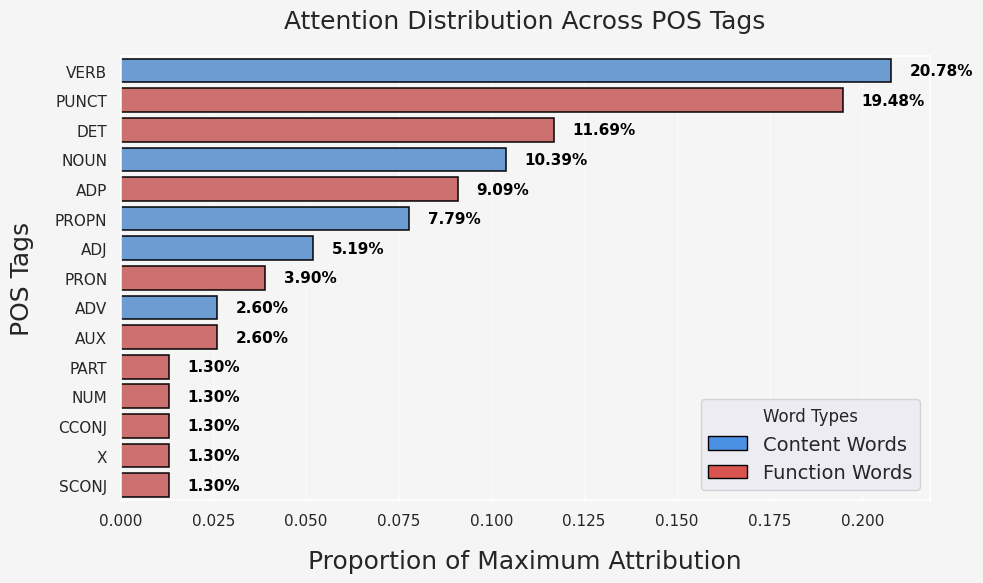

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Prepare data for plotting
pos_tags = list(pos_distribution.keys())
proportions = list(pos_distribution.values())

# Create a sorted order for better visualization (descending order of proportions)
sorted_indices = sorted(range(len(proportions)), key=lambda i: proportions[i], reverse=True)
pos_tags = [pos_tags[i] for i in sorted_indices]
proportions = [proportions[i] for i in sorted_indices]

# Define POS tags for content words and function words
content_pos_tags = {'NOUN', 'PROPN', 'VERB', 'ADJ', 'ADV'}
function_pos_tags = {'PRON', 'ADP', 'PUNCT', 'NUM', 'AUX', 'DET', 'CCONJ', 'SCONJ', 'PART'}

# Create lists for word types based on POS tags
word_types = ['Content' if pos in content_pos_tags else 'Function' for pos in pos_tags]

sns.set_theme()
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#f5f5f5')  # Light grey background
fig.patch.set_facecolor('#f5f5f5')

bar = sns.barplot(x=proportions, y=pos_tags, hue=word_types, dodge=False, 
                  palette={'Content': '#4A90E2', 'Function': '#D9534F'}, ax=ax, edgecolor='black', linewidth=1.2, alpha=0.9)

plt.title('Attention Distribution Across POS Tags', fontsize=18, pad=20)
plt.xlabel('Proportion of Maximum Attribution', fontsize=18, labelpad=15)
plt.ylabel('POS Tags', fontsize=18, labelpad=15)

# Add value annotations on each bar
for i in range(len(proportions)):
    plt.text(proportions[i] + 0.005, i, f'{proportions[i]*100:.2f}%', va='center', ha='left', fontsize=11, fontweight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)
content_patch = mpatches.Patch(facecolor='#4A90E2', label='Content Words', edgecolor='black')
function_patch = mpatches.Patch(facecolor='#D9534F', label='Function Words', edgecolor='black')
legend = plt.legend(handles=[content_patch, function_patch], title='Word Types', fontsize=14, title_fontsize=14, loc='lower right', frameon=True, fancybox=True)
legend.get_title().set_fontsize(12)

plt.tight_layout()
plt.show()
